# Cape Town Airbnb listing EDA

The data that will be used for this project can be accessed [here](http://insideairbnb.com/get-the-data.html). We are interested in the *listings.csv.gz* data containing all Cape Town - South Africa properties listed on the Airbnb website as of 18 July 2018 and 18 November 2018. 

In [2]:
# Import libraries
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import math
from urllib.request import urlopen
from PIL import Image
import matplotlib as mpl
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.linear_model import Lasso
from datetime import datetime , date    
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

We'll start off by importing the csv file using the read_csv function in Pandas


In [3]:
listings = pd.read_csv('data/listings.csv',low_memory=False)
listings_july = pd.read_csv('data/listings July 2018.csv',low_memory=False)

Let's have a look at the data- especially the number of listings, the number of fields, the variable types, as well as the type of information that is available

In [4]:
nrows, ncol = listings.shape

print('Number of listings: {}'.format(nrows))
print('Number of columns: {}'.format(ncol))

Number of listings: 21765
Number of columns: 96


In [5]:
for col, col_type in zip(listings.columns,listings.dtypes):
    print(col + ': '+ str(col_type))

id: int64
listing_url: object
scrape_id: int64
last_scraped: object
name: object
summary: object
space: object
description: object
experiences_offered: object
neighborhood_overview: object
notes: object
transit: object
access: object
interaction: object
house_rules: object
thumbnail_url: float64
medium_url: float64
picture_url: object
xl_picture_url: float64
host_id: int64
host_url: object
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: float64
host_is_superhost: object
host_thumbnail_url: object
host_picture_url: object
host_neighbourhood: object
host_listings_count: float64
host_total_listings_count: float64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
street: object
neighbourhood: float64
neighbourhood_cleansed: object
neighbourhood_group_cleansed: float64
city: object
state: object
zipcode: object
market: object
smart_location: object
c

In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20181118040703,2018-11-18,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...",...,f,NaN,NaN,t,f,moderate,f,f,1,0.62
1,7765,https://www.airbnb.com/rooms/7765,20181118040703,2018-11-18,Garden flat in the city,Our garden flat in Tamboerskloof in the city b...,NaN,Our garden flat in Tamboerskloof in the city b...,none,NaN,...,f,NaN,NaN,f,f,flexible,f,f,1,NaN
2,13044,https://www.airbnb.com/rooms/13044,20181118040703,2018-11-18,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.05
3,15007,https://www.airbnb.com/rooms/15007,20181118040703,2018-11-18,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 8 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",...,f,NaN,NaN,f,f,moderate,f,f,4,0.40
4,15077,https://www.airbnb.com/rooms/15077,20181118040703,2018-11-18,Top relaxed beach living in style,Situated either on the ground floor with direc...,"A stunning architect designed guesthouse, Suns...",Situated either on the ground floor with direc...,none,It is probably the best hub in order to explor...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.07


Next we can investigate the missing values patterns

In [7]:
missing_values_per_field = listings.isnull().mean()

In [8]:
missing_values_per_field.sort_values(ascending=False).head(10)

xl_picture_url                  1.000000
neighbourhood                   1.000000
neighbourhood_group_cleansed    1.000000
host_acceptance_rate            1.000000
medium_url                      1.000000
jurisdiction_names              1.000000
thumbnail_url                   1.000000
license                         0.999449
square_feet                     0.996141
host_neighbourhood              0.993568
dtype: float64

In [9]:
missing_values_per_field.sort_values(ascending=False).tail(10)

room_type                         0.0
property_type                     0.0
is_location_exact                 0.0
longitude                         0.0
latitude                          0.0
calculated_host_listings_count    0.0
country_code                      0.0
smart_location                    0.0
neighbourhood_cleansed            0.0
id                                0.0
dtype: float64

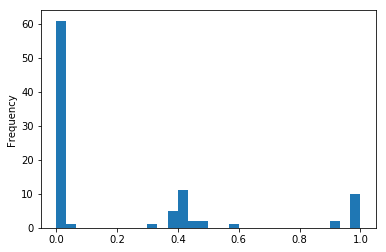

In [10]:
missing_values_per_field.plot.hist(bins=30);

Fields were more than 80% of the values are missing won't be of much use to analyse further. So we'll drop them all together

In [11]:
drop_vars = missing_values_per_field[missing_values_per_field > 0.8].index

In [12]:
listings.drop(drop_vars,axis=1,inplace=True)

We see some very nice fields are availible to explore further. We definitely want to use the price field going forward, but see it's currently a string object. Let's investigate this field further

In [13]:
listings['price'].head()

0      $657.00
1    $2,000.00
2    $1,902.00
3    $2,042.00
4    $1,357.00
Name: price, dtype: object

We see a few things that needs to be taken into account in subsequent analysis and when converting this field to numeric:
* The prices are in dollars. These looked way too high and based on my experience as a South African, it looked like it should be in South African Rands. By going onto Airbnb's website, and looking up a few of the properties, we see that this is indeed the case.
* We should strip out the $ signs and the thousand separators when converting this field to numeric values

In [14]:
remove_chars = dict.fromkeys(map(ord, '$,'), None)
listings['num_price'] = pd.to_numeric(listings['price'].apply(lambda x: x.translate(remove_chars)))

Next we'll have a look at the distribution of the price field

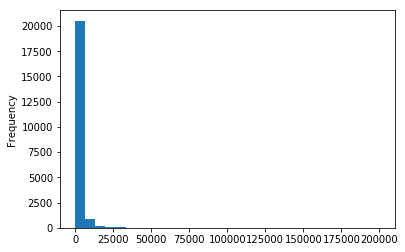

In [15]:
listings['num_price'].plot.hist(bins=30);

Wow, there are quite a few outliers is this dataset. R25 000 rand or more a night sounds a bit steep - even for properties next to the Atlantic sea board!

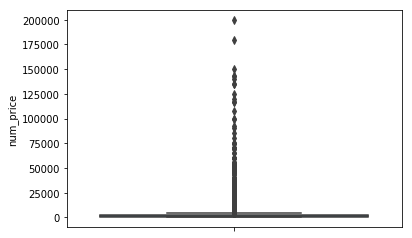

In [16]:
sns.boxplot(y='num_price',data=listings);

Let's see what the 1st and 99th percentiles in price are

In [17]:
pecentile_1 = listings['num_price'].quantile(q=0.01)
pecentile_99 = listings['num_price'].quantile(q=0.99)

print('1st percentile: {}'.format(pecentile_1))
print('99th percentile: {}'.format(pecentile_99))

1st percentile: 210.0
99th percentile: 20004.0


In [18]:
listings['num_price'].describe()

count     21765.000000
mean       2311.707696
std        5484.757564
min           0.000000
25%         643.000000
50%        1105.000000
75%        2154.000000
max      199997.000000
Name: num_price, dtype: float64

The minimum and maximum value can definitely not be correct. By checking some of these listings on the Airbnb's site, we see it's definitely not a data error. Our hypothesis is that the host currently doesn't want to rent out the room/property, but also don't want to remove the listing from Airbnb's website- maybe arduous to list it again or maybe there are some cost considerations involved- so they set it to an exorbitant amount so no-one will book this property. So the question is, what cut-off values should be used for a entry to be classified as an outlier? There are multiple ways to identify outliers in the literature, from using the interquartile (the distance between the 1st and 3rd quartile) range (Tukey's method) to more advanced techniques. Let's calculate the cut-offs using Tukey's method.

In [19]:
pecentile_25 = listings['num_price'].quantile(q=0.25)
pecentile_75 = listings['num_price'].quantile(q=0.75)
IQR = pecentile_75 - pecentile_25

In [20]:
print('Lower cut-off: {}'.format(pecentile_25 - 1.5*IQR))
print('Upper cut-off: {}'.format(pecentile_75 + 1.5*IQR))

Lower cut-off: -1623.5
Upper cut-off: 4420.5


This may be too aggressive- especially for the high end properties that caters for the foreign tourists. By making use of the 1st and 99th percentile, we remove all listings where the price is below or above these cut-off values respectively

In [21]:
outliers_removed = (listings[(listings['num_price'] >= pecentile_1)
                             & (listings['num_price'] <= pecentile_99)].copy())
                                                  
                            

In [22]:
nrows2, ncol2 = outliers_removed.shape

In [23]:
print('Number of rows removed: {}'.format(nrows-nrows2))

Number of rows removed: 404


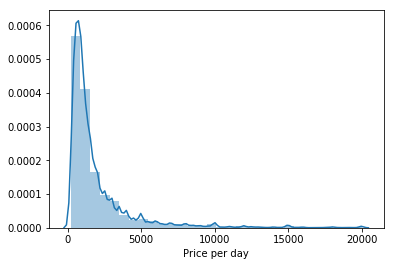

In [24]:
sns.distplot(outliers_removed['num_price'],bins=30,axlabel='Price per day');
plt.savefig('graphs/Prince per day Histogram.png')

So, only around 400 properties were removed. Next we are interested in whether the price per night is correlated to the proximity to the sea. This can be answered either by looking at it visually (points on a map) or calculating the distance of the property to the shore line (possible since the coordinates of the property are included, but more computationally intensive). We make use of [Open Street map](https://www.openstreetmap.org/#map=12/-33.9258/18.4230) to plot the data and the [following](https://stackoverflow.com/questions/28476117/easy-openstreetmap-tile-displaying-for-python#28530369) solution was used as starting block for our analysis.

In [25]:
lat_deg = -34.000
long_deg = 18.372741
delta_lat= 0.15
delta_long =  0.14
zoom = 13

Opening: http://a.tile.openstreetmap.org/13/4514/4915.png
Opening: http://a.tile.openstreetmap.org/13/4514/4916.png
Opening: http://a.tile.openstreetmap.org/13/4514/4917.png
Opening: http://a.tile.openstreetmap.org/13/4514/4918.png
Opening: http://a.tile.openstreetmap.org/13/4514/4919.png
Opening: http://a.tile.openstreetmap.org/13/4515/4915.png
Opening: http://a.tile.openstreetmap.org/13/4515/4916.png
Opening: http://a.tile.openstreetmap.org/13/4515/4917.png
Opening: http://a.tile.openstreetmap.org/13/4515/4918.png
Opening: http://a.tile.openstreetmap.org/13/4515/4919.png
Opening: http://a.tile.openstreetmap.org/13/4516/4915.png
Opening: http://a.tile.openstreetmap.org/13/4516/4916.png
Opening: http://a.tile.openstreetmap.org/13/4516/4917.png
Opening: http://a.tile.openstreetmap.org/13/4516/4918.png
Opening: http://a.tile.openstreetmap.org/13/4516/4919.png
Opening: http://a.tile.openstreetmap.org/13/4517/4915.png
Opening: http://a.tile.openstreetmap.org/13/4517/4916.png
Opening: http:

/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3363: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3372: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3289: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/riaanmostert/anaconda3/envs/GIS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


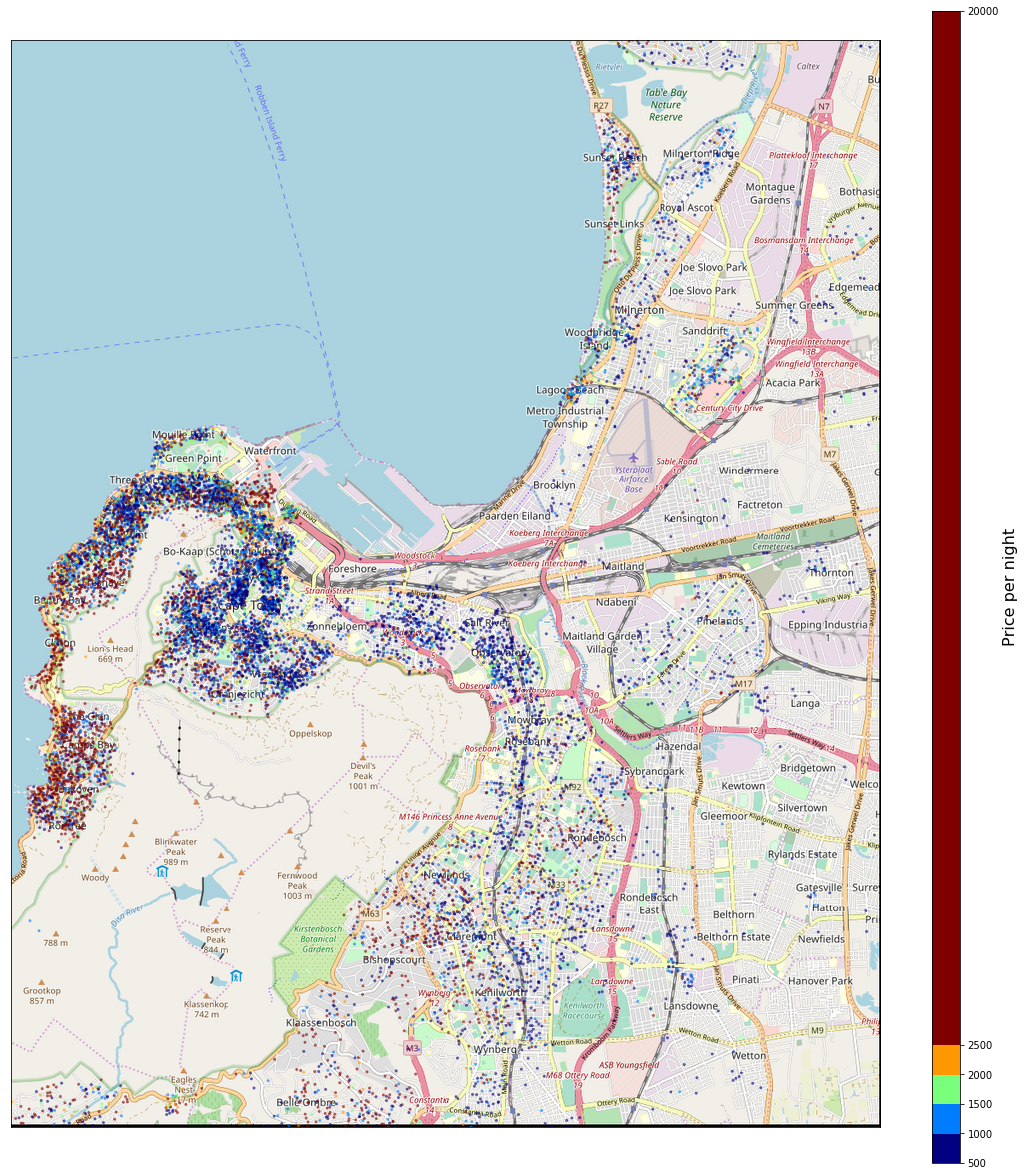

In [26]:

def deg2num(lat_deg, lon_deg, zoom):
    
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
    return (xtile, ytile)

def num2deg(xtile, ytile, zoom):
    
    """
    http://wiki.openstreetmap.org/wiki/Slippy_map_tilenames
    This returns the NW-corner of the square. 
    Use the function with xtile+1 and/or ytile+1 to get the other corners. 
    With xtile+0.5 & ytile+0.5 it will return the center of the tile.
    """
    n = 2.0 ** zoom
    lon_deg = xtile / n * 360.0 - 180.0
    lat_rad = math.atan(math.sinh(math.pi * (1 - 2 * ytile / n)))
    lat_deg = math.degrees(lat_rad)
    return (lat_deg, lon_deg)

def getImageCluster(lat_deg, lon_deg, delta_lat,  delta_long, zoom):
    
    smurl = r"http://a.tile.openstreetmap.org/{0}/{1}/{2}.png"
    xmin, ymax = deg2num(lat_deg, lon_deg, zoom)
    xmax, ymin = deg2num(lat_deg + delta_lat, lon_deg + delta_long, zoom)

    bbox_ul = num2deg(xmin, ymin, zoom)
    bbox_ll = num2deg(xmin, ymax + 1, zoom)
    #print bbox_ul, bbox_ll

    bbox_ur = num2deg(xmax + 1, ymin, zoom)
    bbox_lr = num2deg(xmax + 1, ymax +1, zoom)
    #print bbox_ur, bbox_lr

    Cluster = Image.new('RGB',((xmax-xmin+1)*256-1,(ymax-ymin+1)*256-1) )
    for xtile in range(xmin, xmax+1):
        for ytile in range(ymin,  ymax+1):
            try:
                imgurl=smurl.format(zoom, xtile, ytile)
                print("Opening: " + imgurl)
                tile = Image.open(urlopen(imgurl))
                Cluster.paste(tile, box=((xtile-xmin)*255 ,  (ytile-ymin)*255))
            except: 
                print("Couldn't download image")
                tile = None

    return Cluster, [bbox_ll[1], bbox_ll[0], bbox_ur[1], bbox_ur[0]]

if __name__ == '__main__':

    a, bbox = getImageCluster(lat_deg, long_deg, delta_lat,  delta_long, zoom)

    fig = plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)
 
    cmap = plt.cm.get_cmap(name='jet')    
    m = Basemap(
        llcrnrlon=bbox[0], llcrnrlat=bbox[1],
        urcrnrlon=bbox[2], urcrnrlat=bbox[3],
        projection='merc', ax=ax
    )
    # list of points to display (long, lat)
    ls_points = [m(x,y) for x,y in zip(outliers_removed['longitude'],outliers_removed['latitude'])]
    m.imshow(a, interpolation='lanczos', origin='upper')
    
    
    bounds = [500, 1000, 1500, 2000, 2500, 20000]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
  

    m.scatter(x=[point[0] for point in ls_points],
               y= [point[1] for point in ls_points],
               alpha = 0.5,s=4,c=outliers_removed['num_price'],cmap=cmap,norm=norm)
    

    ax1 = fig.add_axes([0.85, 0.10, 0.02, 0.8])

    cb2 = mpl.colorbar.ColorbarBase(ax1,cmap=cmap,
                                norm=norm,
                                orientation='vertical',
                                ticks=bounds,  
                                spacing='proportional')
    
    
    cb2.set_label('Price per night', fontsize=16)

    

    plt.savefig('graphs/Cape Town map.png',dpi=200,bbox_inches = 'tight',pad_inches = 0)

From the above map, it isn't that clear cut that the closer the property is to the coast line, the higher the price per night. What might be more predictive, is certain 'affluent' suburbs , like Clifton, Camps Bay, Bishopscourt and Llandudno. These suburbs are known as some of the wealthiest in Cape Town (https://businesstech.co.za/news/property/243559/the-most-expensive-streets-suburbs-and-estates-in-cape-town/). We can indeed check this. The cleanest field that can be used for this purpose, is the neighbourhood_cleansed field. This is rolled up to a ward level. We can always create a lookup table to see which neighbourhoods fall in which wards.

In [54]:
ave_price_suburb = (outliers_removed
                    .groupby('neighbourhood_cleansed')['num_price']
                    .agg(['mean','count']))

In [55]:
ave_price_suburb.sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_cleansed,,
Ward 40,4001.000000,1
Ward 54,3833.566534,2773
Ward 62,3548.628205,702
Ward 104,3056.500000,2
Ward 74,2840.928023,1042
Ward 71,2781.483376,391
Ward 69,2367.019120,523
Ward 110,2299.000000,3
Ward 46,2110.105263,19


We are only interested in wards where these are more than 10 listings

In [56]:
ave_price_suburb.query('count > 10').sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_cleansed,,
Ward 54,3833.566534,2773
Ward 62,3548.628205,702
Ward 74,2840.928023,1042
Ward 71,2781.483376,391
Ward 69,2367.019120,523
Ward 46,2110.105263,19
Ward 14,2004.882353,34
Ward 59,1919.047686,713
Ward 4,1836.848765,324


We see the average price per night ranges from R564 in Ward 7 and R3833 in Ward 54.Let's see which neighbourhoods these comprise

In [57]:
wards_of_interest =(outliers_removed.loc[outliers_removed["neighbourhood_cleansed"]
                     .isin(['Ward 7','Ward 54']),:])


In [58]:
pd.pivot_table(index='smart_location',columns='neighbourhood_cleansed',
               data=wards_of_interest,values='id',aggfunc='count')

neighbourhood_cleansed,Ward 54,Ward 7
smart_location,,
"., South Africa",4.0,NaN
"Bakoven, South Africa",3.0,NaN
"Bantry Bay, Cape Town, South Africa",2.0,NaN
"Bantry Bay, South Africa",7.0,NaN
"CAPE TOWN, South Africa",1.0,NaN
"Camps Bay , South Africa",3.0,NaN
"Camps Bay .Cape Town, South Africa",1.0,NaN
"Camps Bay Cape Town, South Africa",1.0,NaN
"Camps Bay, Cape Town , South Africa",1.0,NaN


To get the suburb, we can can write the following lambda function

In [59]:
get_suburb = lambda textstring: textstring.title().split(',')[0].strip()
outliers_removed['suburb'] = outliers_removed['smart_location'].apply(get_suburb)

In [60]:
wards_of_interest =(outliers_removed.loc[outliers_removed["neighbourhood_cleansed"]
                     .isin(['Ward 63','Ward 54']),:])

pd.pivot_table(index='suburb',columns='neighbourhood_cleansed',
               data=wards_of_interest,values='id',aggfunc='count')

neighbourhood_cleansed,Ward 54,Ward 63
suburb,,
.,4.0,NaN
Bakoven,3.0,NaN
Bantry Bay,9.0,NaN
Camps Bay,58.0,NaN
Camps Bay .Cape Town,1.0,NaN
Camps Bay Cape Town,1.0,NaN
Cape Town,2630.0,56.0
Cape Town / Sea Point,1.0,NaN
Cape Town Camps Bay,1.0,NaN


Next we can investigate what type of property is offered

In [61]:
property_type_prop = outliers_removed['property_type'].value_counts()/nrows2
property_type_prop

Apartment             0.368756
House                 0.323580
Guest suite           0.056739
Guesthouse            0.036094
Villa                 0.034736
Bed and breakfast     0.034362
Serviced apartment    0.032864
Condominium           0.026169
Townhouse             0.025701
Loft                  0.014700
Cottage               0.013014
Other                 0.007490
Bungalow              0.006741
Boutique hotel        0.004073
Hostel                0.003371
Chalet                0.002856
Farm stay             0.002294
Cabin                 0.002107
Aparthotel            0.000983
Hotel                 0.000936
Tiny house            0.000421
Resort                0.000375
Earth house           0.000328
Nature lodge          0.000281
Hut                   0.000234
Boat                  0.000234
Lighthouse            0.000094
Vacation home         0.000094
Island                0.000094
Castle                0.000047
Dome house            0.000047
Cave                  0.000047
Barn    

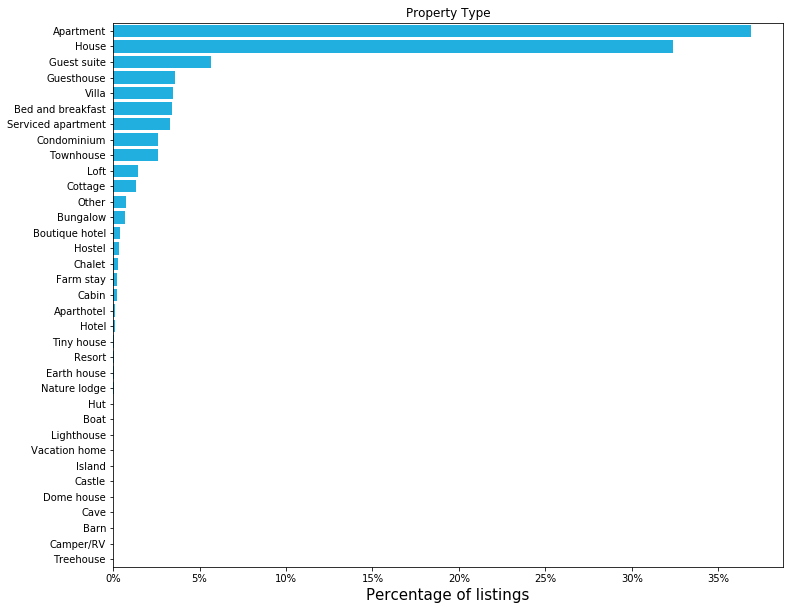

In [62]:
def draw_up_bar_chart(data,label=None):
    
    '''
    Function to draw up a bar chart 
    Arguments:
        data: Pandas Series containing counts/proportions per category
        label: String. Graph header. Default: No header


    Returns:
        None

    '''
    
    fig, ax = plt.subplots(figsize=(12, 10))
    ax = sns.barplot(x=data.values, y=data.index , estimator=sum ,color='deepskyblue',label='medium') 
    ax.set_ylabel(ylabel='')
    ax.set_xlabel('Percentage of listings',fontsize=15)
    if label is not None:
        ax.set_title(label,fontsize=12)
    vals = ax.get_xticks()  
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    
    
    plt.show()
    fig.savefig('graphs/{}.png'.format(label))
    
draw_up_bar_chart(property_type_prop,'Property Type')

We see the majority of properties offered are either Apartments or Houses, followed by guest suites trailing at around 6%. Next we are interested in whether the whole apartment is available or only a room. 

In [63]:
room_type_prop = outliers_removed['room_type'].value_counts()/nrows2
room_type_prop

Entire home/apt    0.765320
Private room       0.228875
Shared room        0.005805
Name: room_type, dtype: float64

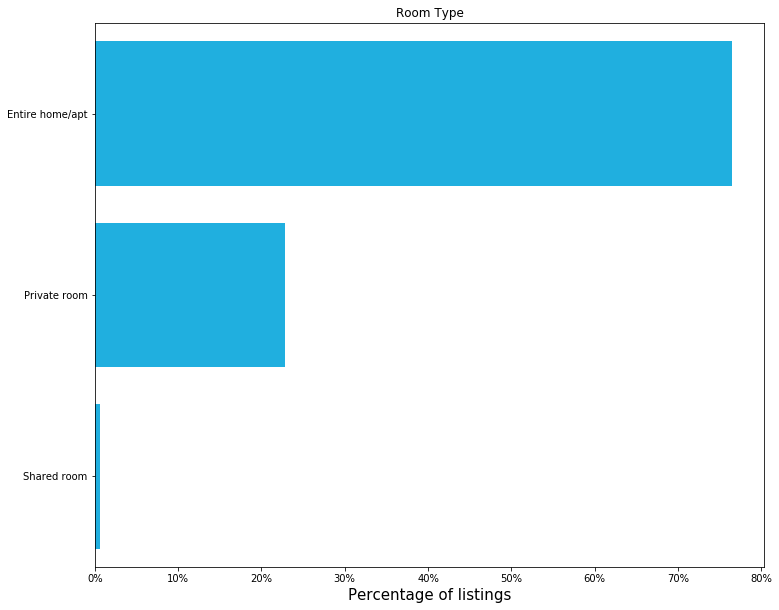

In [64]:
draw_up_bar_chart(room_type_prop,'Room Type')

We see that in the vast majority of cases (76.5%) the whole apartment/home is available for the guest. Next it would be interesting to see the type of amenities that are offered by the host. The following function remove the curly brackets and double quotation marks from the _amenities_ field and split it by comma and create a dictionary of how many times an amenity appear for each listing

In [28]:
outliers_removed['amenities'][0]

'{TV,"Cable TV",Wifi,"Air conditioning",Kitchen,"Free parking on premises","Pets live on this property",Cat(s),"Other pet(s)","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Single level home","BBQ grill","Patio or balcony","Garden or backyard","Luggage dropoff allowed","Long term stays allowed","Cleaning before checkout","Well-lit path to entrance","Host greets you"}'

In [66]:
def my_tokenizer(s):
    
    '''
    Function to split a string into tokens
    
    Arguments:
        s: String that needs to be tokenized


    Returns:
        tokens: List. A list of tokens

    '''
    
    remove_chars = dict.fromkeys(map(ord, '{}"'), None)
    tokens = s.translate(remove_chars).split(',')
    tokens = [t for t in tokens if t not in ['','translation missing: en.hosting_amenity_49',
                                             'translation missing: en.hosting_amenity_50']]
    return tokens

In [67]:
word_index_map = {}
amenities_tokenize = []

for amenity in outliers_removed['amenities']:
    
    tokens = my_tokenizer(amenity)
    amenities_tokenize.append(tokens)
    
    for token in tokens:
        
        if token not in word_index_map:
            word_index_map[token] = 1
        else:
            word_index_map[token] += 1
            


In [68]:
anemities_prop = pd.Series(word_index_map) / nrows2

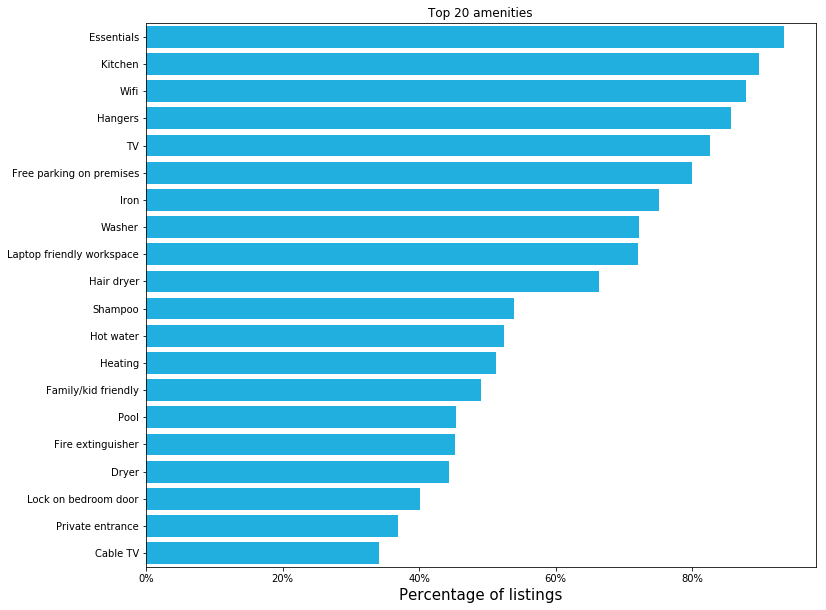

In [69]:
draw_up_bar_chart(anemities_prop.sort_values(ascending=False)[:20],label='Top 20 amenities') 

Next we'll create some indicator variables to indicate the presence or not of each of these amenities

In [70]:
word_index_map = {}
amenities_tokenize = []
current_index = 0

for amenity in outliers_removed['amenities']:
    
    tokens = my_tokenizer(amenity)
    amenities_tokenize.append(tokens)
    
    for token in tokens:
        
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

In [71]:
def tokens_to_vector(tokens):
    
    '''
    Function to create indictator variables for amenities
    
    Arguments:
        tokens: List. A list of tokens


    Returns:
        x: array. An array of size 1 x m, where m is the unique number of amenities

    '''    
    
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1

    return x

In [72]:
data = np.zeros((nrows2,len(word_index_map)))
i = 0

for token in amenities_tokenize:
    xy = tokens_to_vector(token)
    data[i,:] = xy
    i += 1

In [73]:
amenities_df = pd.DataFrame(data,columns=pd.Series(word_index_map).sort_values().index,index=outliers_removed.index)

Let's drop all amenities indicators where there are fewer than 50 instances.

In [74]:
drop_columns = []
for col in amenities_df.columns:
    number_amenities = amenities_df[col].sum()
    
    if number_amenities < 50:
        drop_columns.append(col)

In [75]:
amenities_df.drop(labels=drop_columns,axis=1,inplace=True)

Now we can join the amenities dataframe to our listing dataframe

In [76]:
combined_df = outliers_removed.join(amenities_df)

Next we can convert the _host since_ field to a date time and calculate the number of months this person has been a Airbnb host

In [77]:
combined_df['host_since'] = pd.to_datetime(combined_df['host_since']) 
combined_df['calendar_last_scraped'] = pd.to_datetime(combined_df['calendar_last_scraped']) 

In [78]:
def diff_month(start_date,end_date=date(2018,11,18)):
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

In [79]:
combined_df['months_host'] = combined_df['host_since'].apply(diff_month)

In [80]:
combined_df['months_host'].describe()

count    21357.000000
mean        36.629442
std         20.337040
min          0.000000
25%         23.000000
50%         35.000000
75%         48.000000
max        123.000000
Name: months_host, dtype: float64

In [81]:
months_host = combined_df['months_host'].dropna()

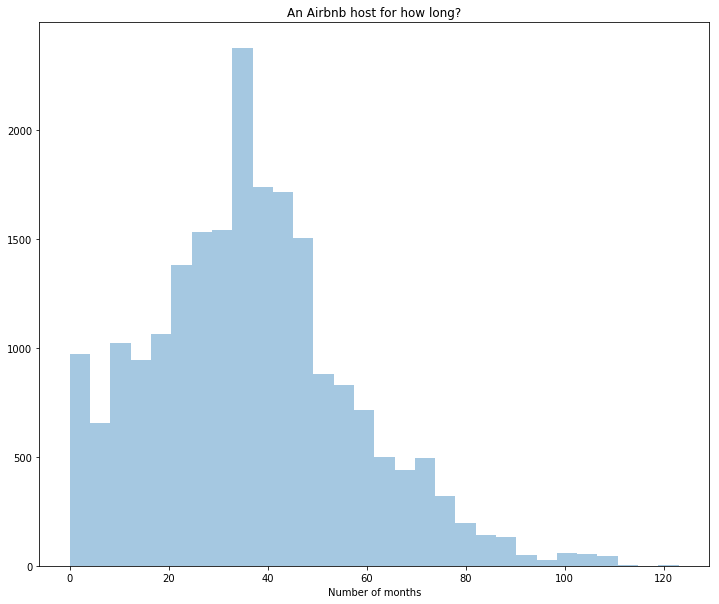

In [82]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.distplot(months_host,bins=30,kde=False,axlabel='Number of months');
plt.title('An Airbnb host for how long?');
plt.savefig('graphs/How long an Airbnb host.png')

Lastly for the exploratory analysis part, it will be interesting to see whether hosts increase their prices between peak season and out of season periods

In [83]:
listings_july['num_price_july'] = pd.to_numeric(listings_july['price'].apply(lambda x: x.translate(remove_chars)))


In [84]:
nov_july_prices = pd.merge(outliers_removed[['id','num_price']],listings_july[['id','num_price_july']],how='inner',on='id')


In [85]:
nov_july_prices.shape

(17315, 3)

In [86]:
nov_july_prices['Price_difference'] = nov_july_prices['num_price'] - nov_july_prices['num_price_july']

In [87]:
nov_july_prices.head()

,id,num_price,num_price_july,Price_difference
0,3191,657.0,625.0,32.0
1,7765,2000.0,1995.0,5.0
2,13044,1902.0,2021.0,-119.0
3,15007,2042.0,2048.0,-6.0
4,15077,1357.0,1316.0,41.0


In [88]:
nov_july_prices.describe()

,id,num_price,num_price_july,Price_difference
count,1.731500e+04,17315.000000,17315.000000,17315.000000
mean,1.504070e+07,1941.821658,1937.478776,4.342882
std,6.823494e+06,2463.685227,2503.555359,586.011486
min,3.191000e+03,210.000000,0.000000,-40496.000000
25%,9.600042e+06,643.000000,652.000000,-4.000000
50%,1.589393e+07,1105.000000,1077.000000,1.000000
75%,2.126327e+07,2000.000000,1995.000000,7.000000
max,2.689138e+07,20004.000000,45000.000000,19086.000000


From the above table we see that the vast majority of hosts didn't increase their prices- more specifically 50% of hosts changed their prices between R4 and R7! We can also split the price changes into 10 deciles to get a clearer picture.

In [89]:
nov_july_prices['Price_difference'].quantile(q=np.linspace(0, 1, num=11))

0.0   -40496.0
0.1       -9.0
0.2       -6.0
0.3       -4.0
0.4       -1.0
0.5        1.0
0.6        4.0
0.7        5.0
0.8        9.0
0.9       57.0
1.0    19086.0
Name: Price_difference, dtype: float64

Again, we see only 10% of this listings had an increase of R57 or more between July and December

Let's plot these differences

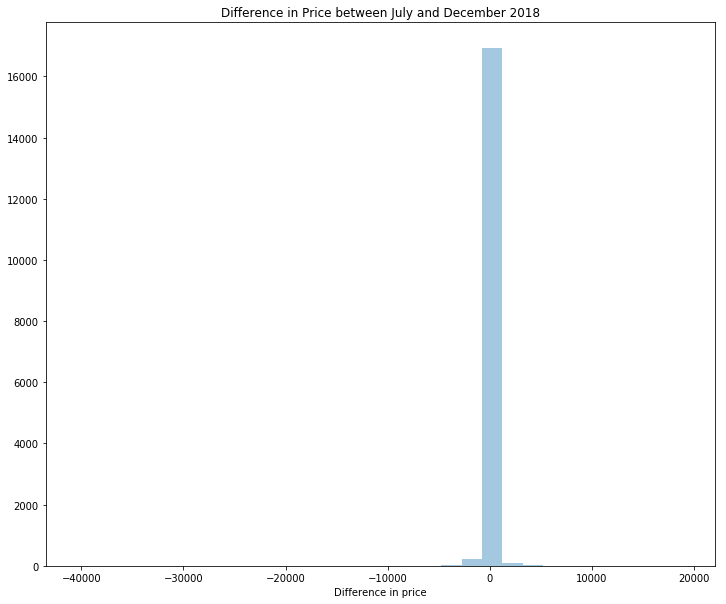

In [90]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.distplot(nov_july_prices['Price_difference'],bins=30,kde=False,axlabel='Difference in price');
plt.title('Difference in Price between July and December 2018');
plt.savefig('graphs/Price differences.png')

# Lasso regression

In the next section we are interested to see which features are most predictive of price. We need to do a few additional data manipulations before we can start modeling. We first have to replace the _host is superhost_ field with 1s and 0s

In [91]:
combined_df['host_is_superhost'] = combined_df['host_is_superhost'].apply(lambda x:1 if x== 't' else 0)

In [92]:
combined_df['host_is_superhost'] .value_counts()

0    17689
1     3672
Name: host_is_superhost, dtype: int64

Next we can group the smaller property type categories into a separate _other_ category

In [93]:
def property_type_grouped(prop_type):
    if prop_type in ['Apartment','House','Guest suite','Guesthouse','Villa',
                     'Bed and breakfast','Serviced apartment','Condominium','Townhouse']:
        return prop_type
    else:
        return 'Other'
    

In [94]:
combined_df['property_type_grouped'] =combined_df['property_type'].apply(property_type_grouped)

In [95]:
combined_df['property_type_grouped'].value_counts()

Apartment             7877
House                 6912
Other                 1303
Guest suite           1212
Guesthouse             771
Villa                  742
Bed and breakfast      734
Serviced apartment     702
Condominium            559
Townhouse              549
Name: property_type_grouped, dtype: int64

We can also create a new field that indicates the vacancy rate of the property for the next 30 days

In [96]:
combined_df['vacancy_rate_next30'] = combined_df['availability_30']/30*100

Next we'll dummy encode the following categorical variables:
* neighbourhood_cleansed
* property_type_grouped
* room_type

In [97]:
combined_df = pd.get_dummies(combined_df,columns=['neighbourhood_cleansed','property_type_grouped','room_type'],dummy_na=True)

In [98]:
combined_df.shape

(21361, 333)

In [99]:
neighbourhood_vars = [col for col in combined_df.columns if col.startswith('neighbourhood_cleansed')]
property_type_vars = [col for col in combined_df.columns if col.startswith('property_type_grouped')]
room_type_vars = [col for col in combined_df.columns if col.startswith('room_type')]

In [100]:
features = (['months_host','host_is_superhost', 'review_scores_rating',
'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_value',
             'vacancy_rate_next30'] 
            + list(amenities_df.columns)
            + neighbourhood_vars
            + property_type_vars
            + room_type_vars)


Next we can calculate the percentage of missing values in each column

In [101]:
perc_missings = combined_df[features].isnull().mean()

In [102]:
perc_missings.sort_values(ascending=False)

review_scores_value                0.404007
review_scores_location             0.403820
review_scores_checkin              0.403680
review_scores_accuracy             0.403399
review_scores_communication        0.403352
review_scores_cleanliness          0.403258
review_scores_rating               0.402556
months_host                        0.000187
Lockbox                            0.000000
High chair                         0.000000
Window guards                      0.000000
Crib                               0.000000
Pocket wifi                        0.000000
Wide doorway                       0.000000
Beach essentials                   0.000000
Doorman                            0.000000
Gym                                0.000000
Elevator                           0.000000
Dog(s)                             0.000000
Other                              0.000000
Smoking allowed                    0.000000
Changing table                     0.000000
Pool                            

We see that only the _review scores_ and  _months host_ field contains missing values. We'll replace missing ratings with 0s and create an flag to indicate whether the rating was missing or not. We'll drop all listing where the _months host_ field is missing.

In [103]:
impute_vars = ['review_scores_rating',
'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_value']

In [104]:
for var in impute_vars:
    imp_varname = var + '_imp'
    combined_df[imp_varname] = combined_df[var].isnull()
    combined_df[var] = combined_df[var].fillna(value=0)
    features.append(imp_varname)

In [105]:
combined_df.dropna(axis=0,how='any', subset=['months_host'], inplace=True)

In [106]:
y = combined_df['num_price']
X = combined_df[features]

In [107]:
X.columns = [column.replace(" ","_") for column in X.columns]

We'll make use of a Lasso model to do feature selection

In [108]:
lasso_model = Lasso(normalize=True,alpha=1)

In [109]:
lasso_model.fit(X,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

We'll write the following function the extract the features that have a non-zero coefficient

In [110]:
def lasso_summary_table(fitted_obj,features):
    
    '''
    Function to create indictator variables for amenities
    
    Arguments:
        fitted_obj: object. A fitted sklearn model object
        features: list. A list of the features included in the model


    Returns:
        output: pandas dataframe. A dataframe containing the non-zero coefficients 
        features

    '''    

    
    
    output = pd.DataFrame({'Variable': features,'Coefficient': fitted_obj.coef_},columns=['Variable', 'Coefficient'])
    output = output.loc[abs(output.Coefficient) > 0,:]
    output.sort_values(by='Coefficient',ascending=False,inplace=True)
    
    return output


In [111]:
output = lasso_summary_table(lasso_model,features)

In [112]:
output

,Variable,Coefficient
251,property_type_grouped_Villa,2961.896751
201,neighbourhood_cleansed_Ward 54,1392.201221
253,room_type_Entire home/apt,774.458860
80,Indoor fireplace,631.080534
247,property_type_grouped_House,587.502050
13,Air conditioning,564.368937
78,Pool,505.137834
22,Dryer,448.768469
210,neighbourhood_cleansed_Ward 62,282.915132
257,review_scores_rating_imp,28.618023


In [113]:
output.shape

(14, 2)

We see that only 14 of the feaaures came out as predictive- with Villa Property type contributing the most to price, followed by properties situated in Ward 54

# Random forest

Next we make use of a Random forest to see whether the same features come out as most predictive 

In [114]:
rf = RandomForestRegressor(n_estimators=100)

In [115]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [116]:
def feature_importance_graph(fitted_object,features,label,top=10):
    
    '''
    Function to create a variable importance graph
    
    Arguments:
        fitted_obj: object. A fitted sklearn model object
        features: list. A list of the features included in the model
        label: string. Name of saved graph
        top: int. The number of top features to return


    Returns:
        None

    ''' 
    
    features_df = pd.DataFrame({'feature': features, 'Importance': fitted_object.feature_importances_})
    features_df.sort_values(by='Importance',ascending=False,inplace=True)
    top10 = features_df.iloc[:top]
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.barplot(y='feature',x='Importance',data=top10,orient='h')
    plt.savefig('graphs/{}.png'.format(label),bbox_inches = "tight")
    


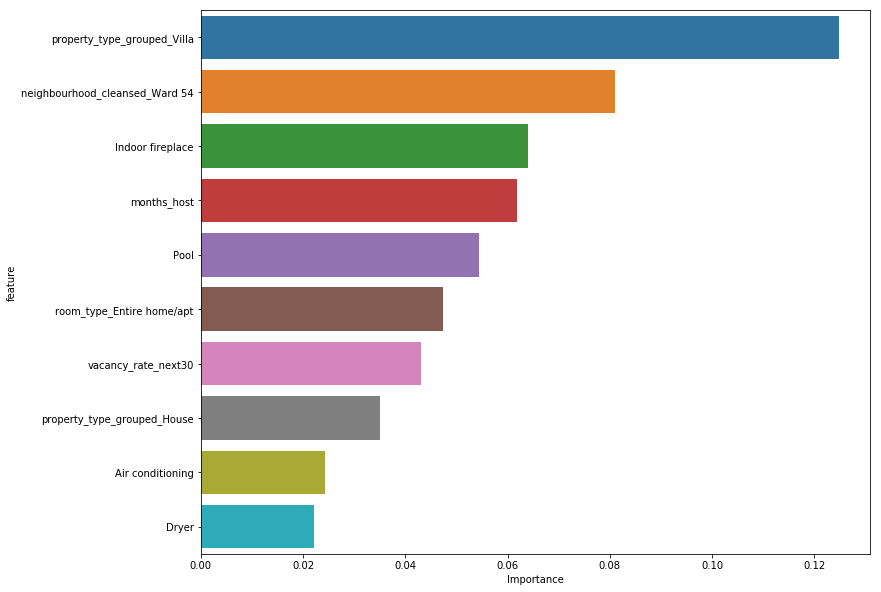

In [117]:
feature_importance_graph(rf,features,'Feature importance graph - price')

We see that there are overlaps between the Lasso results and the random forest results - with both Villa and Ward 54 coming out tops. Instead of modelling price, we'll model price per person, since we expect that the price will be higher if it can accomodate more people - which is curious since it didn't feature in the Lasso or Random forest model. 

In [118]:
y2 = combined_df['num_price']/combined_df['accommodates']

In [119]:
rf_2 = RandomForestRegressor(n_estimators=100)

In [120]:
rf_2.fit(X,y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

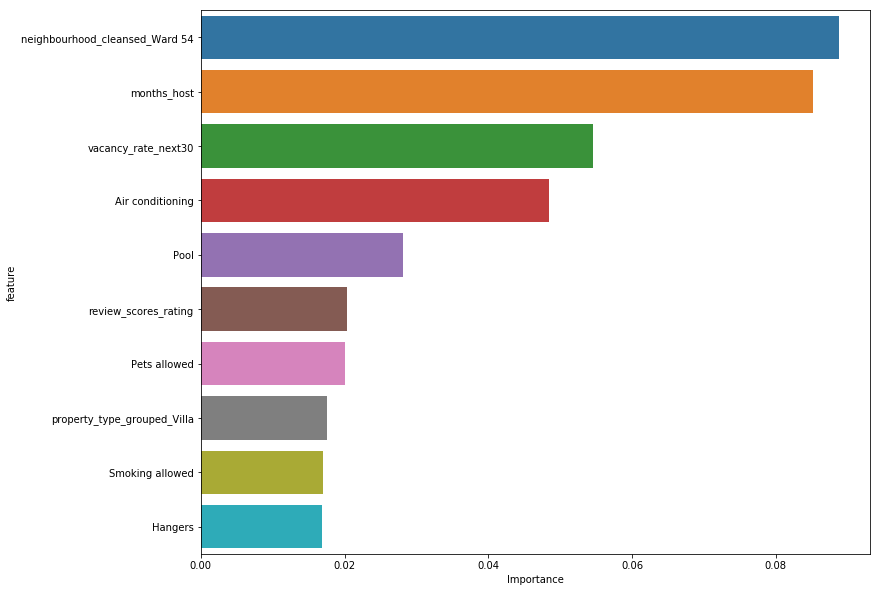

In [121]:
feature_importance_graph(rf_2,features,'Feature importance graph - price per person')

In [122]:
combined_df['price_per_person'] = combined_df['num_price']/combined_df['accommodates']

We can see what the nature of the relationship is by making use of Lasso regression again. We I tried to fit it using  $\alpha$ = 1, it didn't return any features, so I tried $\alpha$ = 0.5 

In [123]:
lasso_model = Lasso(normalize=True,alpha=0.5)

In [124]:
lasso_model.fit(X,y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
output = lasso_summary_table(lasso_model,features)

In [126]:
output

,Variable,Coefficient
251,property_type_grouped_Villa,3134.747114
201,neighbourhood_cleansed_Ward 54,1583.753276
253,room_type_Entire home/apt,915.741109
247,property_type_grouped_House,661.992064
210,neighbourhood_cleansed_Ward 62,658.632293
13,Air conditioning,650.069114
80,Indoor fireplace,604.549838
78,Pool,541.863539
22,Dryer,482.104308
223,neighbourhood_cleansed_Ward 74,232.056739


Now we see only 4 variables coming out as predictive, with listings situated in Ward 54 coming out tops. followed by whether the property has air conditioning. 